# Model

Importing Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

lr = LinearRegression()
ss = StandardScaler()

Load Dataset

In [2]:
scrape_df = pd.read_csv('./datasets/RealtorDataAmes.csv')
train_df = pd.read_csv('./datasets/Feat_train.csv')

In [3]:
scrape_df.shape

(253, 10)

### Scaling

In [4]:
X_train=train_df.drop(['SalePrice'],axis=1)
y_train=train_df['SalePrice']
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

### Linear regression

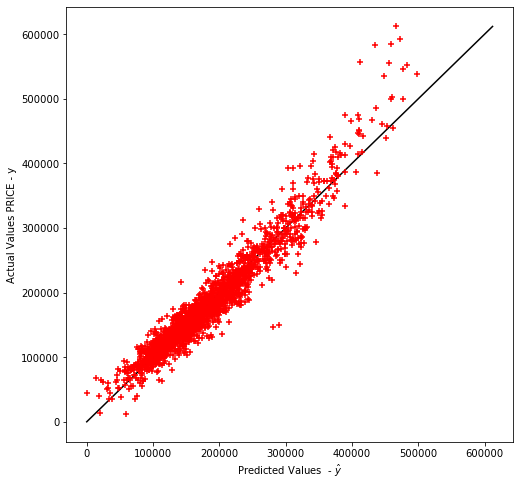

In [5]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train_scaled, y_train)

predictions  =  model.predict(X_train_scaled)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values  - $\hat{y}$")
plt.ylabel("Actual Values PRICE - y")

plt.plot([0, np.max(y_train)], [0, np.max(y_train)], c = 'k')

plt.show()

In [6]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Implementing Regression Models

1. Kernel Ridge Regression
2. Elastic Net Regression
3. Gradient Boosting Regression
4. XGBoost

In [7]:

#1
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#2
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#3
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#4
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,seed=7, nthread = -1)

### Scores for above base models

In [8]:
score = rmsle_cv(KRR)
score_K = cross_val_score(KRR,X_train_scaled,y_train, n_jobs = -1)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Kernel Ridge R^2 score: {:.4f} ({:.4f})\n".format(score_K.mean(), score_K.std()))

score = rmsle_cv(ENet)
score_E = cross_val_score(KRR,X_train_scaled,y_train, n_jobs = -1)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("ElasticNet R^2 score: {:.4f} ({:.4f})\n".format(score_E.mean(), score_E.std()))

score = rmsle_cv(GBoost)
score_G = cross_val_score(KRR,X_train_scaled,y_train, n_jobs = -1)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("Gradient Boosting R^2 score: {:.4f} ({:.4f})\n".format(score_G.mean(), score_G.std()))


score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score_X = cross_val_score(KRR,X_train_scaled,y_train, n_jobs = -1)
print("Xgboost R^2 score: {:.4f} ({:.4f})\n".format(score_X.mean(), score_X.std()))

C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.31784e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.22008e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.30204e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.14672e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.54902e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py

Kernel Ridge score: 74525.3485 (29316.9891)

Kernel Ridge R^2 score: 0.8087 (0.1158)



C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNet score: 28529.5251 (6078.4964)

ElasticNet R^2 score: 0.8087 (0.1158)



C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Gradient Boosting score: 22167.5879 (3274.4958)

Gradient Boosting R^2 score: 0.8087 (0.1158)

Xgboost score: 21613.1030 (2730.3722)



C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Xgboost R^2 score: 0.8087 (0.1158)



### Ensemble learning

In [9]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (ENet, GBoost, KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.31784e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.22008e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.30204e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.14672e-19): result may not be accurate.
  overwrite_a=False)


 Averaged base models score: 34977.8026 (10216.8509)



C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.54902e-19): result may not be accurate.
  overwrite_a=False)


In [10]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [13]:
#Final Training and Prediction

#StackedRegressor:

averaged_models.fit(X_train_scaled.values, y_train)
stacked_train_pred = averaged_models.predict(X_train_scaled.values)
# stacked_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
# XGBoost

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.30))

In [ ]:
# Ensembled Predictions:
ensemble = stacked_pred*0.70 + xgb_pred*0.30

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)